# Creating Seasonal Forecasting Dashboards in Python

Welcome to the technical training on data integration in seasonal forecasting, made by HKV. 

1. [Section 1: TAHMO data](#section-1)
2. [Section 2: Introduction to web apps in Solara](#section-2)
3. [Section 3: Building a seasonal forecast dashboard](#section-3)


### Section 1: TAHMO data


In [2]:
import TAHMO

In [3]:
# The demo credentials listed below give you access to three pre-defined stations. 
# Please use the API credentials provided to you to get access to all stations configured for you specifically.
api = TAHMO.apiWrapper()
api.setCredentials('demo', 'DemoPassword1!')

In [4]:
# Example 1: Get metadata from all stations that your account has access to.
stations = api.getStations()
print('Account has access to stations: %s' % ', '.join(list(stations)))

API request: services/assets/v2/stations
Account has access to stations: TA00016, TA00134, TA00252


In [5]:
# Example 2: Get all variables and units from the TAHMO API.
variables = api.getVariables()
print('Available variables in TAHMO API:')
for variable in variables:
    print('%s [%s] with shortcode "%s"' %
          (variables[variable]['description'], variables[variable]['units'], variables[variable]['shortcode']))

API request: services/assets/v2/variables
Available variables in TAHMO API:
Atmospheric pressure [kPa] with shortcode "ap"
Depth of water [mm] with shortcode "dw"
Electrical conductivity of precipitation [mS/cm] with shortcode "ec"
Electrical conductivity of water [mS/cm] with shortcode "ew"
Lightning distance [km] with shortcode "ld"
Lightning events [-] with shortcode "le"
Shortwave radiation [W/m2] with shortcode "ra"
Soil moisture content [m3/m3] with shortcode "sm"
Soil temperature [degrees Celsius] with shortcode "st"
Surface air temperature [degrees Celsius] with shortcode "te"
Vapor pressure [kPa] with shortcode "vp"
Wind gusts [m/s] with shortcode "wg"
Wind speed [m/s] with shortcode "ws"
Temperature of humidity sensor [degrees Celsius] with shortcode "ht"
X-axis level [degrees] with shortcode "tx"
Y-axis level [degrees] with shortcode "ty"
Logger battery percentage [-] with shortcode "lb"
Logger reference pressure [kPa] with shortcode "lp"
Logger temperature [degrees Celsius]

In [6]:
# Example 3: Retrieve a pandas dataframe containing the time serie of surface air observations and save to CSV file.
station = 'TA00252'
startDate = '2019-01-01'
endDate = '2019-01-31'
variables = ['te', 'ap']

df = api.getMeasurements(station, startDate=startDate, endDate=endDate, variables=variables)
df.index.name = 'Timestamp'
df.to_csv('timeseries.csv', na_rep='', date_format='%Y-%m-%d %H:%M')
print('Timeseries saved to file "timeseries.csv"')

API request: services/measurements/v2/stations/TA00252/measurements/controlled
Timeseries saved to file "timeseries.csv"


In [7]:
import pandas as pd

In [9]:
df = pd.read_csv('timeseries.csv', index_col='Timestamp', parse_dates=True)

<Axes: xlabel='Timestamp'>

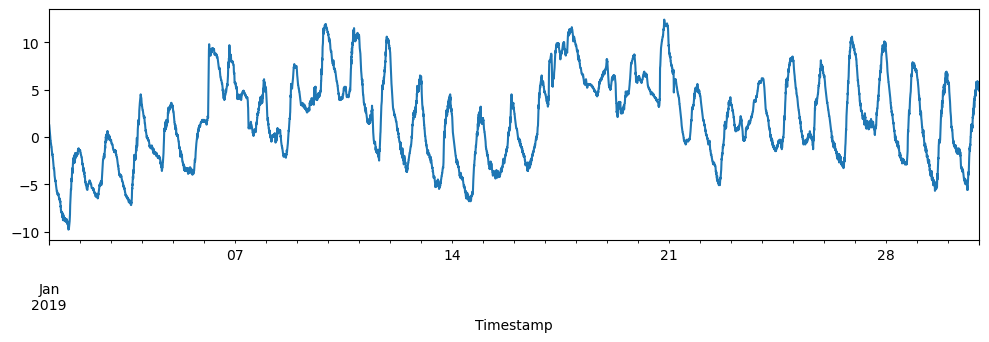

In [12]:
df['te'].plot(figsize=(12,3))